In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
import sklearn.metrics as metrics
import seaborn as sns

In [17]:
df=pd.read_csv("Downloads\Hr data.csv")

In [18]:
df

,Position,Level,Salary
0,Teaching Assistants,1,45000
1,Guest Faculty,2,50000
2,Contractual Faculty,3,60000
3,Assistant Professor,4,80000
4,Associate Professor,5,110000
5,Professor,6,150000
6,Associate Dean,7,200000
7,Dean,8,300000
8,Vice Chancellor,9,500000
9,Chancellor,10,1000000


In [4]:
df.corr()

,Level,Salary
Level,1.000000,0.817949
Salary,0.817949,1.000000


In [5]:
x=df.iloc[:,1:2].values
y=df.iloc[:,2].values
x


array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]], dtype=int64)

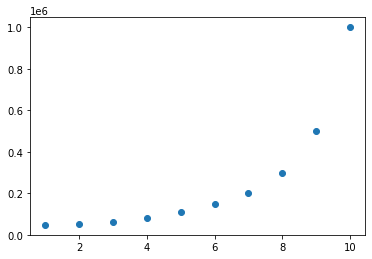

In [6]:
#checking for linear relation
plt.scatter(x,y)
plt.ylim(0,)
plt.show()

In [7]:
#splitting data set into train set and test split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)
x_train,x_test,y_train,y_test
                            


(array([[ 5],
        [10],
        [ 2],
        [ 7],
        [ 8],
        [ 4],
        [ 1],
        [ 6]], dtype=int64),
 array([[3],
        [9]], dtype=int64),
 array([ 110000, 1000000,   50000,  200000,  300000,   80000,   45000,
         150000], dtype=int64),
 array([ 60000, 500000], dtype=int64))

In [8]:
#fitting linear regression to the data set
reg=linear_model.LinearRegression()
reg.fit(x,y)
reg.predict(x)

array([-114454.54545455,  -33575.75757576,   47303.03030303,
        128181.81818182,  209060.60606061,  289939.39393939,
        370818.18181818,  451696.96969697,  532575.75757576,
        613454.54545455])

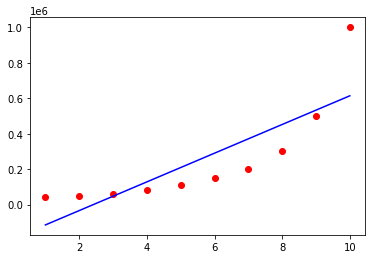

In [9]:
#visualizing the results
plt.scatter(x,y,color='red')
plt.plot(x,reg.predict(x),color='blue')
plt.show()

In [10]:
#fitting polynomial regression to the data set
poly_reg=PolynomialFeatures(degree=4)
x_poly=poly_reg.fit_transform(x)
x_poly.reshape(1,-1)

array([[1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00,
        2.000e+00, 4.000e+00, 8.000e+00, 1.600e+01, 1.000e+00, 3.000e+00,
        9.000e+00, 2.700e+01, 8.100e+01, 1.000e+00, 4.000e+00, 1.600e+01,
        6.400e+01, 2.560e+02, 1.000e+00, 5.000e+00, 2.500e+01, 1.250e+02,
        6.250e+02, 1.000e+00, 6.000e+00, 3.600e+01, 2.160e+02, 1.296e+03,
        1.000e+00, 7.000e+00, 4.900e+01, 3.430e+02, 2.401e+03, 1.000e+00,
        8.000e+00, 6.400e+01, 5.120e+02, 4.096e+03, 1.000e+00, 9.000e+00,
        8.100e+01, 7.290e+02, 6.561e+03, 1.000e+00, 1.000e+01, 1.000e+02,
        1.000e+03, 1.000e+04]])

In [11]:
pr=linear_model.LinearRegression()
pr.fit(x_poly,y)
p=pr.predict(x_poly)



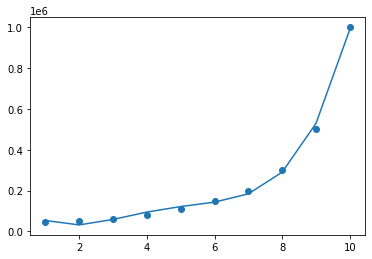

In [12]:
#visualizing the results
plt.scatter(x,y)
plt.plot(x,pr.predict(x_poly))
plt.show()

In [13]:
reg.predict([[5.5]])

array([249500.])

In [14]:
#metrics calculation
mse=metrics.mean_squared_error(y,p)
r2=metrics.r2_score(y,p)
print(mse,r2)

210343822.8438233 0.9973922891706614


In [15]:
pr.predict(poly_reg.fit_transform([[5.5]]))

array([132148.43750003])

In [16]:
pr.predict(poly_reg.fit_transform([[6.7]]))

array([167442.36756993])

In [20]:
x.shape

(10, 1)

In [24]:
Y=y.reshape(10,1)